<center> <h1> Finansal Veri Analizi, Tahmini ve İlişkili Hisselerin Belirlenmesi
</h1>
</center>

---
<br>

# Proje Amacı :
Bu proje, İstanbul Borsası'nda işlem gören hisse senetlerinin finansal verilerini analiz etmeyi, gelecekteki fiyatlarını tahmin etmeyi ve bu hisseler arasındaki ilişkileri belirlemeyi amaçlamaktadır. Finansal veri analizi makine öğrenimi ve derin öğrenme tekniklerini kullanarak, hisse senetlerinin fiyat hareketlerini anlamak ve yatırım kararlarını desteklemek hedeflenmektedir. Ayrıca, hisseler arasındaki korelasyonları inceleyerek, birbiriyle ilişkili hisseleri tespit etmek ve yatırımcılara çeşitlendirme stratejileri için rehberlik etmek planlanmaktadır.

<br>

<h3>Kullanılacak İndikatörler :</h3>

- <strong>RSI(Relative Strength Index)</strong>

- <strong>Ichimoku Bulutu</strong>

- <strong>SMA(Simple Moving Average)</strong>

- <strong>Bollinger Bantları</strong>

- <strong>MACD (Moving Average Convergence Divergence)</strong>

<br>

<h3>Proje Adımları :</h3>

<ol>
  <li>Veri setinin eklenmesi.</li>
  <li>Verinin İncelenmesi.</li>
  <li>Günlük fiyat değişimlerinin standart sapmasının bulunması</li>
  <li>Kapanış Fiyat değerlerinin görselleştirilmesi</li>
  <li>SMA İndikatörünün hesaplanması ve görselleştirilmesi</li>
  <li>RSI İndikatörünün hesaplanması ve görselleştirilmesi</li>
  <li>Bollinger Bantlarının hesaplanması ve görselleştirilmesi</li>
  <li>Ichimoku Bulutu'nun hesaplanması ve görselleştirilmesi</li>
  <li>MACD İndikatörünün hesaplanması</li>
  <li>Derin öğrenme modelinin oluşturulması.</li>
  <li>Modelin gerçek verilerle test edilmesi.</li>
  <li>Modelin yılsonu fiyatlandırması için tahminde bulunması</li>
  <li>Kolere ve ters kolere hisselerin bulunması</li>
  <li>Kolere/Ters Kolere hisselerin graflar ile görselleştirilmesi</li>
  <li>Modeldeki muhtemel sapma unsurunun bulunması ve görselleştirilmesi.</li>
</ol>


<br>



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Verinin İncelenmesi

In [2]:
# Örnek Bir Veri İle Çalışma
start = "2020-01-01"
end ="2024-04-14"
veri = yf.download(["SASA.IS"],start = start,end = end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
veri.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1.231314,1.264722,1.229723,1.255177,1.255177,71738202
2020-01-03,1.240859,1.248813,1.202679,1.234496,1.234496,77498196
2020-01-06,1.209042,1.220178,1.197906,1.197906,1.197906,55860342
2020-01-07,1.209042,1.236086,1.209042,1.224950,1.224950,42476559
2020-01-08,1.193134,1.216996,1.189952,1.201088,1.201088,46820746


In [4]:
veri.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-03,38.480000,39.299999,38.380001,38.439999,38.439999,35452917
2024-04-04,38.599998,39.240002,37.799999,37.799999,37.799999,50633051
2024-04-05,38.119999,40.119999,38.040001,39.660000,39.660000,73770633
2024-04-08,39.799999,41.080002,39.520000,40.380001,40.380001,50309471
2024-04-09,40.419998,41.880001,40.419998,41.400002,41.400002,28653696


In [5]:
veri.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
veri.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1.073000e+03
mean,21.778132,22.361369,21.282394,21.785506,21.785506,8.706146e+07
std,20.306277,20.870239,19.793243,20.306630,20.306630,8.650002e+07
min,0.774741,0.822467,0.774741,0.792241,0.792241,0.000000e+00
25%,4.075745,4.177560,3.958023,4.088472,4.088472,3.900540e+07
50%,11.398881,11.688683,11.205680,11.345214,11.345214,5.967611e+07
75%,42.919998,43.799999,42.000000,42.847775,42.847775,1.005913e+08
max,80.414711,81.187515,75.820808,79.985374,79.985374,7.052696e+08


# Günlük kapanış farklarının incelenmesi ve standart sapmanın bulunması.

---

**Standar Sapma neden önemlidir ?**
 - Standart sapma fiyat oynaklığını yani volaliteyi ölçebilmek için önemlidir.
 - Standart sapma, fiyat hareketlerinin ne kadar değişken olduğunu göstererek, fiyat tahminlerinin güvenilirliğini değerlendirmeye yardımcı olabilir.

**Volalite Nedir ?**
- Volatilite, fiyat tahmini yaparken kullanılan bir faktördür. Yüksek volatilite, fiyatların belirsizliğini artırır ve bu da gelecekteki fiyatları tahmin etmeyi zorlaştırır.

In [7]:
fark = veri["Close"].diff()

In [8]:
fark.head()

Date
2020-01-02         NaN
2020-01-03   -0.020681
2020-01-06   -0.036590
2020-01-07    0.027044
2020-01-08   -0.023862
Name: Close, dtype: float64

In [9]:
std = fark.std()

In [10]:
print("Standart Sapma :", std)

Standart Sapma : 1.236032273909282


<br>

# Kapanış Fiyatının Görselleştirilmesi

Text(0.5, 1.0, 'Kapanış Fiyatının Dağılımı')

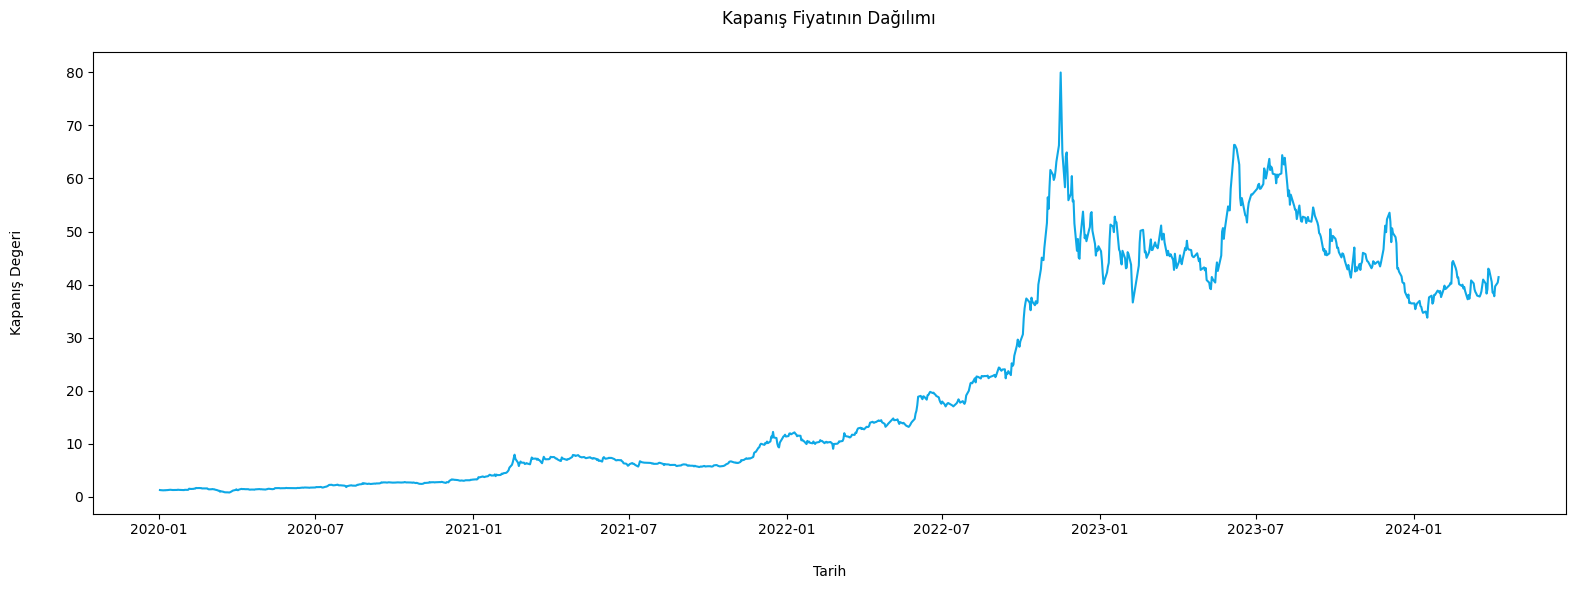

In [11]:
plt.figure(figsize=(19,6))
plt.plot(veri["Close"],"#0ea8e6")
plt.xlabel("Tarih",labelpad=20)
plt.ylabel("Kapanış Degeri", labelpad=30)
plt.title("Kapanış Fiyatının Dağılımı",pad=20)

# SMA(Simple Moving Average) İndikatörü


---


**Basit Hareketli Ortalama (SMA) Nedir?**

 Basit Hareketli Ortalama (SMA), finansal analizde sıkça kullanılan bir tekniktir. SMA, belirli bir zaman dilimi içindeki fiyatların ortalamasını alarak, fiyatların düzgünleştirilmiş bir gösterimini sağlar. Bu yöntem, fiyat hareketlerindeki gürültüyü azaltmak ve temel eğilimleri belirlemek için kullanılır.


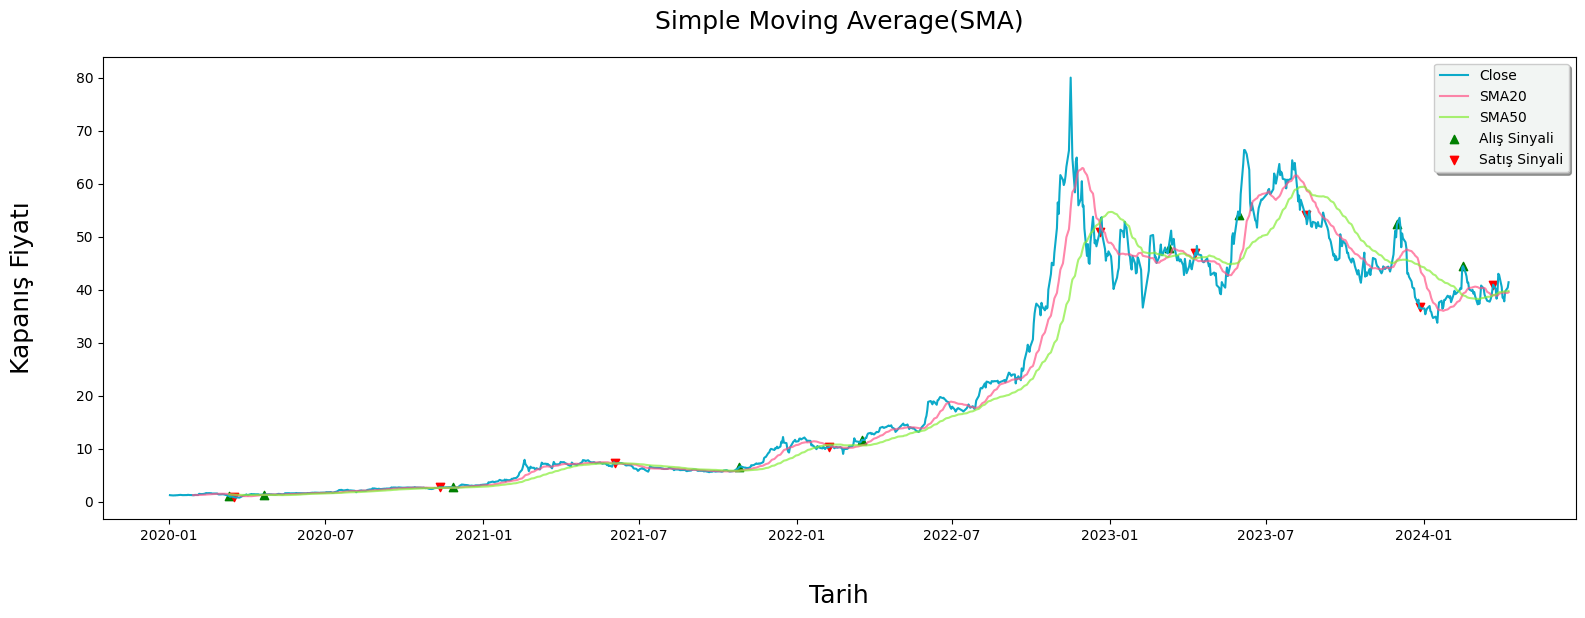

In [16]:
def simple_moving_average(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# Hareketli ortalamaları hesapla
veri['SMA20'] = simple_moving_average(veri, period=20)
veri['SMA50'] = simple_moving_average(veri, period=50)

# Alış ve satış sinyallerini hesapla
veri['Signal'] = np.where(veri['SMA20'] > veri['SMA50'], 1, 0)
veri['Position'] = veri['Signal'].diff()

# Alış ve satış fiyatlarını işaretle
veri['Buy'] = np.where(veri['Position'] == 1, veri['Close'], np.nan)
veri['Sell'] = np.where(veri['Position'] == -1, veri['Close'], np.nan)

# Grafiği çiz
plt.figure(figsize=(19, 6))
plt.plot(veri['Close'], label='Close', color="#0caac9")
plt.plot(veri['SMA20'], alpha=0.7, label='SMA20', color="#ff5487")
plt.plot(veri['SMA50'], alpha=0.7, label='SMA50', color="#86ed37")
plt.scatter(veri.index, veri['Buy'], alpha=1, label='Alış Sinyali', marker='^', color='green')
plt.scatter(veri.index, veri['Sell'], alpha=1, label='Satış Sinyali', marker='v', color='red')
plt.title('Simple Moving Average(SMA)', fontsize=18, pad=20)
plt.xlabel('Tarih', fontsize=18, labelpad = 30)
plt.ylabel('Kapanış Fiyatı', fontsize=18 , labelpad = 30)
plt.legend(shadow=True, facecolor="#f2f5f3")

# Bollinger Bantları


---

**Bollinger Bantları Nedir ?**

Bollinger Bantları, volatiliteyi ölçmek ve fiyatların aşırı alım veya aşırı satım seviyelerine ulaşıp ulaşmadığını belirlemek için kullanılır. Bantların daralması, piyasada düşük volatiliteyi gösterirken, genişlemesi yüksek volatiliteyi gösterir. Fiyatlar üst banttan çıktığında aşırı alım, alt banttan çıktığında ise aşırı satım sinyali olarak yorumlanabilir.

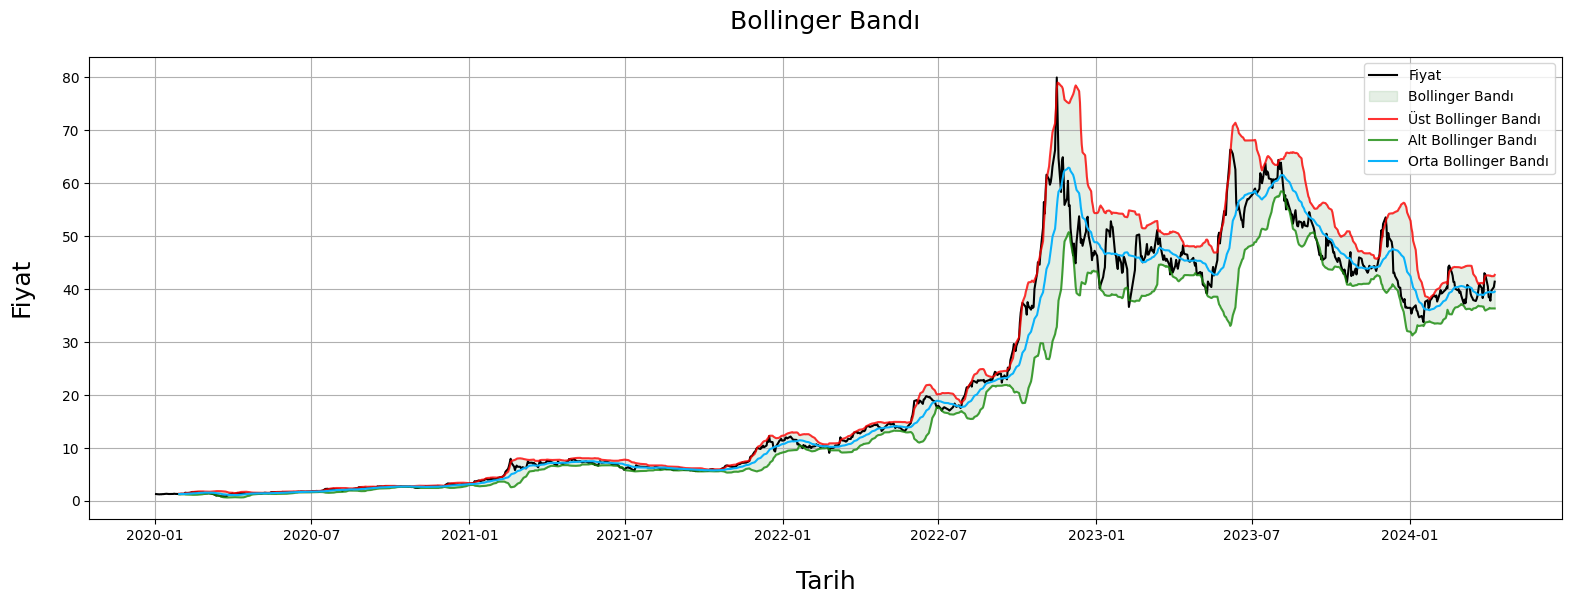

In [38]:
veri["SMA"] = veri["Close"].rolling(window=20).mean()
veri["SD"] = veri["Close"].rolling(window=20).std()
veri["UB"] = veri["SMA"] + (2*veri["SD"])
veri["LB"] = veri["SMA"] - (2*veri["SD"])

plt.figure(figsize=(19,6))
plt.plot(veri.index, veri["Close"], label="Fiyat", color="black")
plt.fill_between(veri.index, veri["UB"], veri["LB"], color="darkgreen", alpha=0.1, label="Bollinger Bandı")
plt.plot(veri.index, veri["UB"],label="Üst Bollinger Bandı", color="red", alpha=0.8)
plt.plot(veri.index, veri["LB"], label="Alt Bollinger Bandı",color="#188a0b", alpha=0.8)
plt.plot(veri.index, veri["SMA"], label="Orta Bollinger Bandı", color="#0ab2fa")
plt.title("Bollinger Bandı", fontsize=18, pad=20)
plt.xlabel("Tarih", fontsize=18, labelpad=20)
plt.ylabel("Fiyat", fontsize=18,labelpad=20)
plt.legend()
plt.grid(True)